In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import mne
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from mne.decoding import CSP, UnsupervisedSpatialFilter
from sklearn.decomposition import PCA
from Cho2017 import SubjectData


ICA_SEED = 97 # Just some random seed
SPLIT_SEED = 42
data_path = 'denoise_classify_data/'
subject_data_pickle_path = lambda n: os.path.join(data_path, 'data_{}.pkl'.format(n))
subject_ica_pickle_path = lambda n: os.path.join(data_path, 'ica_{}.pkl'.format(n))

plt.rcParams['figure.figsize'] = [12, 8]
# # Make sure ipympl is installed (via pip) for interactive plots in Jupyter 
# %matplotlib widget

In [2]:
excludes = {}
with open('ica_excludes_SEED-97_THRESH-0.9.pkl', 'rb') as f:
    excludes = pkl.load(f)



Subject 01
Loading denoise_classify_data/data_1.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_1.pkl
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(124, 64, 2561)
(124,)
Imagery Train Dataset Shape: (86, 64, 2561)
Imagery Test Dataset Shape: (38, 64, 2561)
Imagery Train Labels Shape: (86,)
Imagery Test Labels Shape: (38,)
Computing rank from data with rank=None
    Using tolerance 0.00019 (2.2e-16 eps * 64 dim * 1.3e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalu

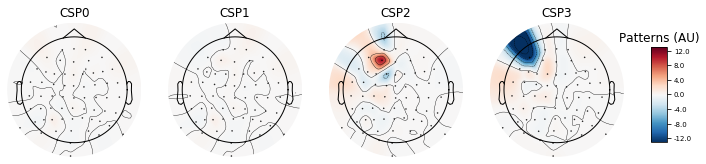



Subject 02
Loading denoise_classify_data/data_2.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_2.pkl
Transforming to ICA space (64 components)
Zeroing out 3 ICA components
(185, 64, 2561)
(185,)
Imagery Train Dataset Shape: (129, 64, 2561)
Imagery Test Dataset Shape: (56, 64, 2561)
Imagery Train Labels Shape: (129,)
Imagery Test Labels Shape: (56,)
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.8e+09  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.9e+09  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 64 data channels with 0 projectors
    Setting small MAG eigen

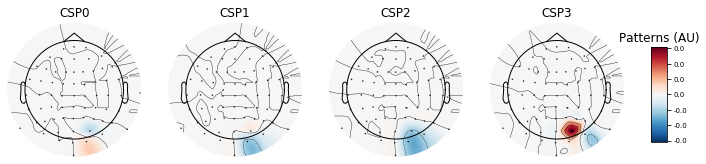



Subject 03
Loading denoise_classify_data/data_3.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_3.pkl
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(200, 64, 2561)
(200,)
Imagery Train Dataset Shape: (140, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (140,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00017 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenv

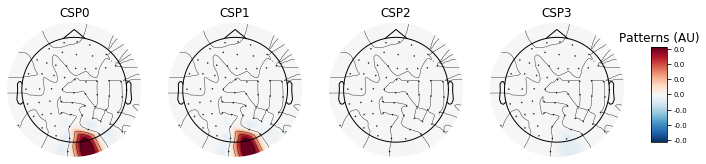



Subject 04
Loading denoise_classify_data/data_4.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_4.pkl
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(190, 64, 2561)
(190,)
Imagery Train Dataset Shape: (133, 64, 2561)
Imagery Test Dataset Shape: (57, 64, 2561)
Imagery Train Labels Shape: (133,)
Imagery Test Labels Shape: (57,)
Computing rank from data with rank=None
    Using tolerance 0.00025 (2.2e-16 eps * 64 dim * 1.8e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00026 (2.2e-16 eps * 64 dim * 1.9e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigen

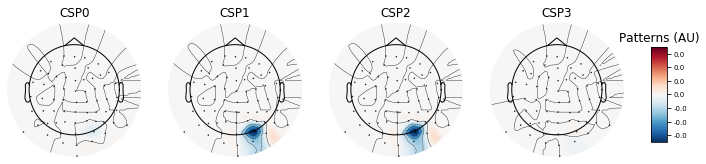



Subject 05
Loading denoise_classify_data/data_5.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_5.pkl
Transforming to ICA space (64 components)
Zeroing out 27 ICA components
(28, 64, 2561)
(28,)
Imagery Train Dataset Shape: (19, 64, 2561)
Imagery Test Dataset Shape: (9, 64, 2561)
Imagery Train Labels Shape: (19,)
Imagery Test Labels Shape: (9,)
Computing rank from data with rank=None
    Using tolerance 6.5e-05 (2.2e-16 eps * 64 dim * 4.6e+09  max singular value)
    Estimated rank (mag): 37
    MAG: rank 37 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 37
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.6e-05 (2.2e-16 eps * 64 dim * 5.4e+09  max singular value)
    Estimated rank (mag): 37
    MAG: rank 37 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalue

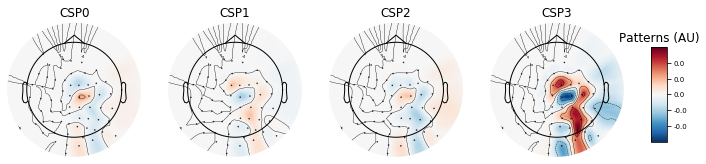



Subject 06
Loading denoise_classify_data/data_6.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_6.pkl
Transforming to ICA space (64 components)
Zeroing out 34 ICA components
(200, 64, 2561)
(200,)
Imagery Train Dataset Shape: (140, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (140,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 7.8e-05 (2.2e-16 eps * 64 dim * 5.5e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.9e-05 (2.2e-16 eps * 64 dim * 5.6e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 64 data channels with 0 projectors
    Setting small MAG eige

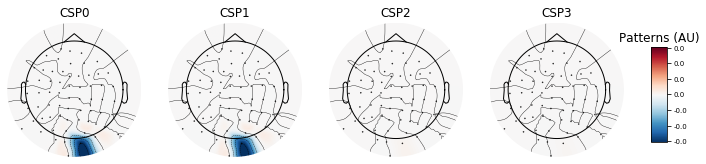



Subject 08
Loading denoise_classify_data/data_8.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_8.pkl
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(196, 64, 2561)
(196,)
Imagery Train Dataset Shape: (137, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (137,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalue

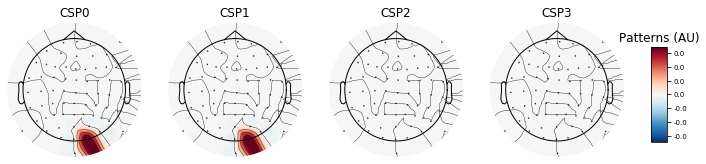



Subject 09
Loading denoise_classify_data/data_9.pkl
120 events found
Event IDs: [1]
120 events found
Event IDs: [1]
Loading denoise_classify_data/ica_9.pkl
Transforming to ICA space (64 components)
Zeroing out 3 ICA components
(239, 64, 2561)
(239,)
Imagery Train Dataset Shape: (167, 64, 2561)
Imagery Test Dataset Shape: (72, 64, 2561)
Imagery Train Labels Shape: (167,)
Imagery Test Labels Shape: (72,)
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 64 data channels with 0 projectors
    Setting small MAG eigenva

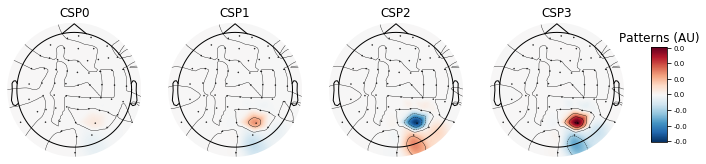



Subject 10
Loading denoise_classify_data/data_10.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_10.pkl
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(198, 64, 2561)
(198,)
Imagery Train Dataset Shape: (138, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (138,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00025 (2.2e-16 eps * 64 dim * 1.7e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00024 (2.2e-16 eps * 64 dim * 1.7e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eig

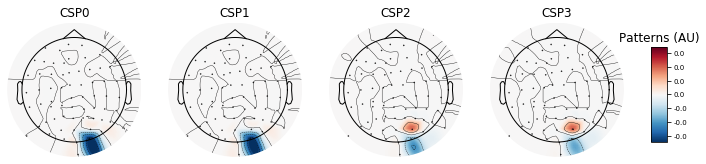



Subject 11
Loading denoise_classify_data/data_11.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_11.pkl
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(182, 64, 2561)
(182,)
Imagery Train Dataset Shape: (127, 64, 2561)
Imagery Test Dataset Shape: (55, 64, 2561)
Imagery Train Labels Shape: (127,)
Imagery Test Labels Shape: (55,)
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenv

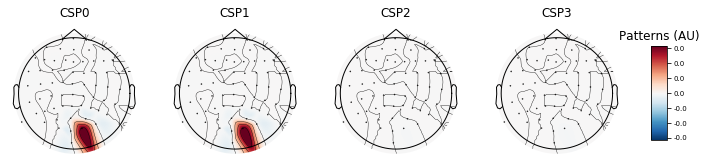



Subject 12
Loading denoise_classify_data/data_12.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_12.pkl
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(102, 64, 2561)
(102,)
Imagery Train Dataset Shape: (71, 64, 2561)
Imagery Test Dataset Shape: (31, 64, 2561)
Imagery Train Labels Shape: (71,)
Imagery Test Labels Shape: (31,)
Computing rank from data with rank=None
    Using tolerance 0.00023 (2.2e-16 eps * 64 dim * 1.6e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00028 (2.2e-16 eps * 64 dim * 2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenva

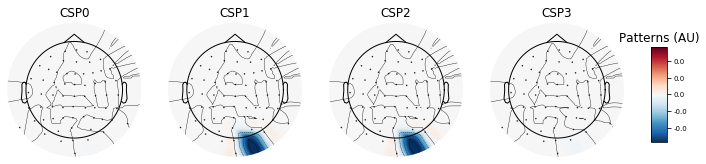



Subject 13
Loading denoise_classify_data/data_13.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_13.pkl
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(145, 64, 2561)
(145,)
Imagery Train Dataset Shape: (101, 64, 2561)
Imagery Test Dataset Shape: (44, 64, 2561)
Imagery Train Labels Shape: (101,)
Imagery Test Labels Shape: (44,)
Computing rank from data with rank=None
    Using tolerance 0.00022 (2.2e-16 eps * 64 dim * 1.5e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00021 (2.2e-16 eps * 64 dim * 1.5e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eig

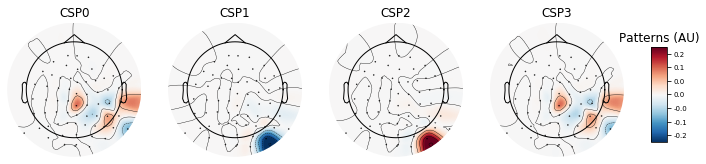



Subject 14
Loading denoise_classify_data/data_14.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_14.pkl
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(194, 64, 2561)
(194,)
Imagery Train Dataset Shape: (135, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (135,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00025 (2.2e-16 eps * 64 dim * 1.7e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00025 (2.2e-16 eps * 64 dim * 1.7e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eige

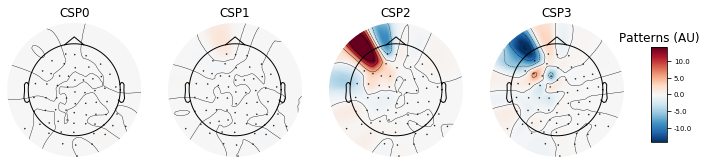



Subject 15
Loading denoise_classify_data/data_15.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_15.pkl
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(169, 64, 2561)
(169,)
Imagery Train Dataset Shape: (118, 64, 2561)
Imagery Test Dataset Shape: (51, 64, 2561)
Imagery Train Labels Shape: (118,)
Imagery Test Labels Shape: (51,)
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigen

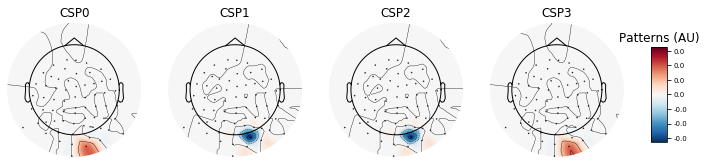



Subject 16
Loading denoise_classify_data/data_16.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_16.pkl
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(196, 64, 2561)
(196,)
Imagery Train Dataset Shape: (137, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (137,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenv

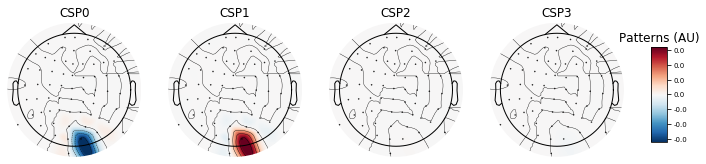



Subject 17
Loading denoise_classify_data/data_17.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_17.pkl
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(194, 64, 2561)
(194,)
Imagery Train Dataset Shape: (135, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (135,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenval

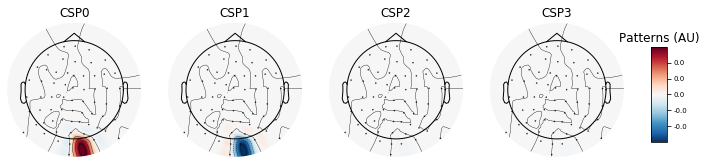



Subject 18
Loading denoise_classify_data/data_18.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_18.pkl
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(197, 64, 2561)
(197,)
Imagery Train Dataset Shape: (137, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (137,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigen

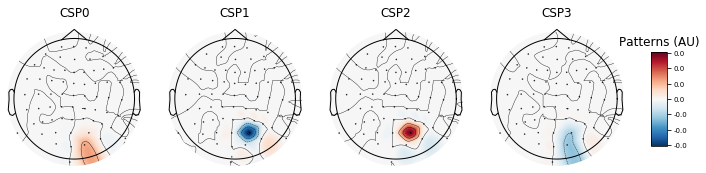



Subject 19
Loading denoise_classify_data/data_19.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_19.pkl
Transforming to ICA space (64 components)
Zeroing out 9 ICA components
(185, 64, 2561)
(185,)
Imagery Train Dataset Shape: (129, 64, 2561)
Imagery Test Dataset Shape: (56, 64, 2561)
Imagery Train Labels Shape: (129,)
Imagery Test Labels Shape: (56,)
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.4e+09  max singular value)
    Estimated rank (mag): 55
    MAG: rank 55 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 55
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 8.9e+09  max singular value)
    Estimated rank (mag): 55
    MAG: rank 55 computed from 64 data channels with 0 projectors
    Setting small MAG eig

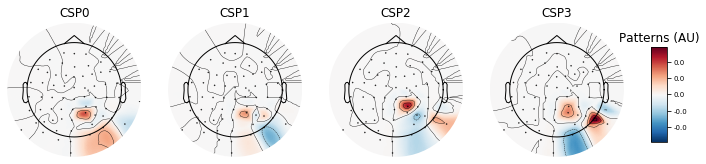



Subject 20
Loading denoise_classify_data/data_20.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_20.pkl
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(193, 64, 2561)
(193,)
Imagery Train Dataset Shape: (135, 64, 2561)
Imagery Test Dataset Shape: (58, 64, 2561)
Imagery Train Labels Shape: (135,)
Imagery Test Labels Shape: (58,)
Computing rank from data with rank=None
    Using tolerance 0.00029 (2.2e-16 eps * 64 dim * 2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00026 (2.2e-16 eps * 64 dim * 1.9e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigen

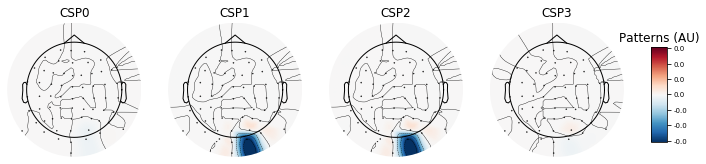



Subject 21
Loading denoise_classify_data/data_21.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_21.pkl
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(198, 64, 2561)
(198,)
Imagery Train Dataset Shape: (138, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (138,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00028 (2.2e-16 eps * 64 dim * 2e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00026 (2.2e-16 eps * 64 dim * 1.8e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenv

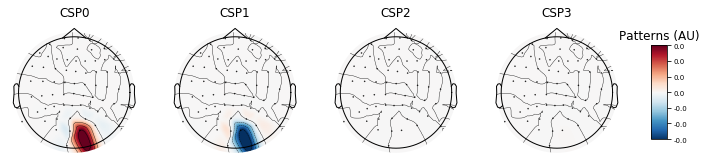



Subject 22
Loading denoise_classify_data/data_22.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_22.pkl
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(169, 64, 2561)
(169,)
Imagery Train Dataset Shape: (118, 64, 2561)
Imagery Test Dataset Shape: (51, 64, 2561)
Imagery Train Labels Shape: (118,)
Imagery Test Labels Shape: (51,)
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigen

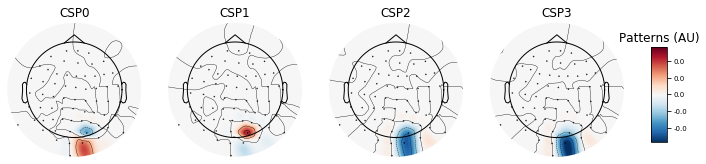



Subject 23
Loading denoise_classify_data/data_23.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_23.pkl
Transforming to ICA space (64 components)
Zeroing out 7 ICA components
(197, 64, 2561)
(197,)
Imagery Train Dataset Shape: (137, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (137,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00024 (2.2e-16 eps * 64 dim * 1.7e+10  max singular value)
    Estimated rank (mag): 57
    MAG: rank 57 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 57
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00022 (2.2e-16 eps * 64 dim * 1.6e+10  max singular value)
    Estimated rank (mag): 57
    MAG: rank 57 computed from 64 data channels with 0 projectors
    Setting small MAG eig

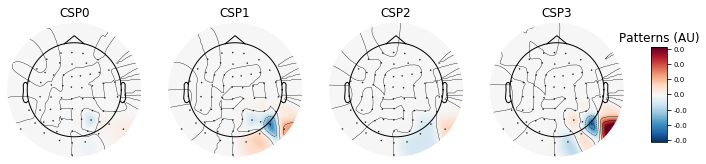



Subject 24
Loading denoise_classify_data/data_24.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_24.pkl
Transforming to ICA space (64 components)
Zeroing out 6 ICA components
(170, 64, 2561)
(170,)
Imagery Train Dataset Shape: (119, 64, 2561)
Imagery Test Dataset Shape: (51, 64, 2561)
Imagery Train Labels Shape: (119,)
Imagery Test Labels Shape: (51,)
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.7e+09  max singular value)
    Estimated rank (mag): 58
    MAG: rank 58 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 58
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 9.2e+09  max singular value)
    Estimated rank (mag): 58
    MAG: rank 58 computed from 64 data channels with 0 projectors
    Setting small MAG eig

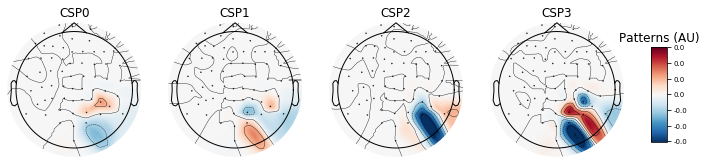



Subject 25
Loading denoise_classify_data/data_25.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_25.pkl
Transforming to ICA space (64 components)
Zeroing out 7 ICA components
(196, 64, 2561)
(196,)
Imagery Train Dataset Shape: (137, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (137,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00019 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 57
    MAG: rank 57 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 57
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.3e+10  max singular value)
    Estimated rank (mag): 57
    MAG: rank 57 computed from 64 data channels with 0 projectors
    Setting small MAG eig

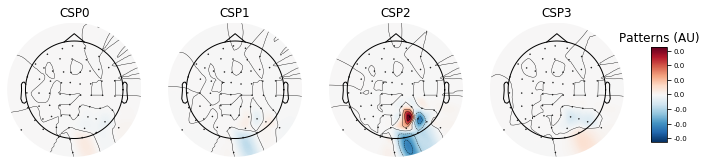



Subject 26
Loading denoise_classify_data/data_26.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_26.pkl
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(191, 64, 2561)
(191,)
Imagery Train Dataset Shape: (133, 64, 2561)
Imagery Test Dataset Shape: (58, 64, 2561)
Imagery Train Labels Shape: (133,)
Imagery Test Labels Shape: (58,)
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.3e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eig

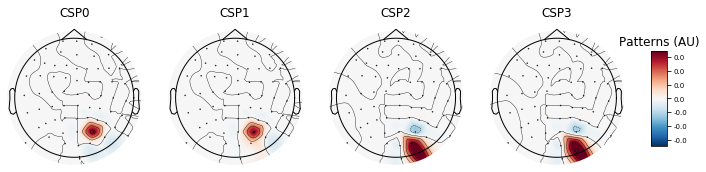



Subject 27
Loading denoise_classify_data/data_27.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_27.pkl
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(60, 64, 2561)
(60,)
Imagery Train Dataset Shape: (42, 64, 2561)
Imagery Test Dataset Shape: (18, 64, 2561)
Imagery Train Labels Shape: (42,)
Imagery Test Labels Shape: (18,)
Computing rank from data with rank=None
    Using tolerance 7.9e-05 (2.2e-16 eps * 64 dim * 5.5e+09  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.1e-05 (2.2e-16 eps * 64 dim * 5e+09  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalue

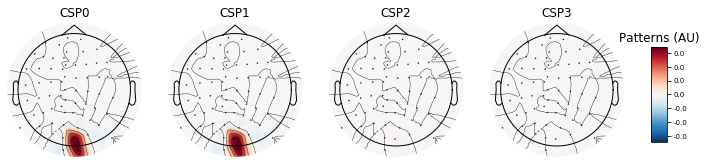



Subject 28
Loading denoise_classify_data/data_28.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_28.pkl
Transforming to ICA space (64 components)
Zeroing out 5 ICA components
(192, 64, 2561)
(192,)
Imagery Train Dataset Shape: (134, 64, 2561)
Imagery Test Dataset Shape: (58, 64, 2561)
Imagery Train Labels Shape: (134,)
Imagery Test Labels Shape: (58,)
Computing rank from data with rank=None
    Using tolerance 0.00017 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 59
    MAG: rank 59 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 59
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 59
    MAG: rank 59 computed from 64 data channels with 0 projectors
    Setting small MAG eig

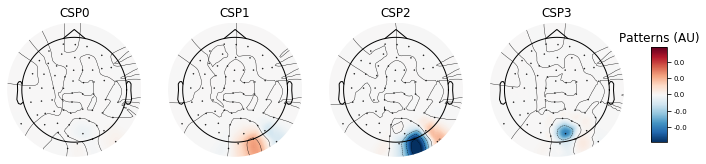



Subject 29
Loading denoise_classify_data/data_29.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_29.pkl
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(198, 64, 2561)
(198,)
Imagery Train Dataset Shape: (138, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (138,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.5e+09  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.2e+09  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eige

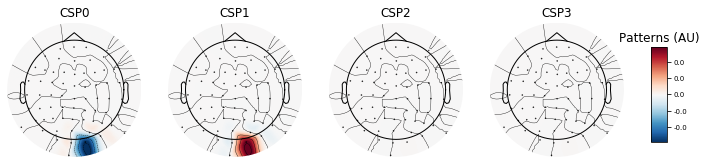



Subject 30
Loading denoise_classify_data/data_30.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_30.pkl
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(199, 64, 2561)
(199,)
Imagery Train Dataset Shape: (139, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (139,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 9e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 9e+09  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenva

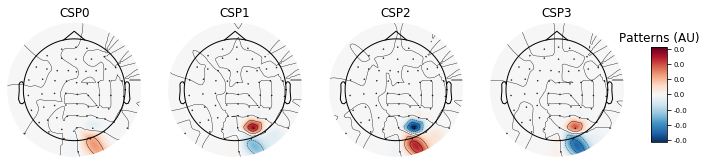



Subject 31
Loading denoise_classify_data/data_31.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_31.pkl
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(196, 64, 2561)
(196,)
Imagery Train Dataset Shape: (137, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (137,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0002 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenv

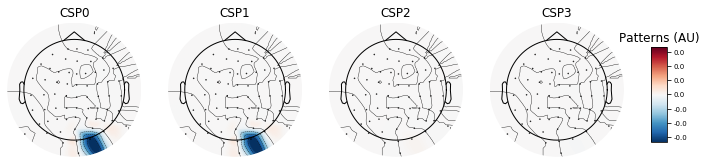



Subject 32
Loading denoise_classify_data/data_32.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_32.pkl
Transforming to ICA space (64 components)
Zeroing out 4 ICA components
(183, 64, 2561)
(183,)
Imagery Train Dataset Shape: (128, 64, 2561)
Imagery Test Dataset Shape: (55, 64, 2561)
Imagery Train Labels Shape: (128,)
Imagery Test Labels Shape: (55,)
Computing rank from data with rank=None
    Using tolerance 0.00017 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 60
    MAG: rank 60 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 60
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 60
    MAG: rank 60 computed from 64 data channels with 0 projectors
    Setting small MAG eig

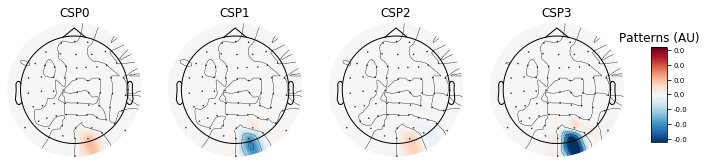



Subject 33
Loading denoise_classify_data/data_33.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_33.pkl
Transforming to ICA space (64 components)
Zeroing out 27 ICA components
Error in:  33 :  Found array with 0 sample(s) (shape=(0, 64)) while a minimum of 1 is required.


Subject 34
Loading denoise_classify_data/data_34.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_34.pkl
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(198, 64, 2561)
(198,)
Imagery Train Dataset Shape: (138, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (138,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.3e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (with

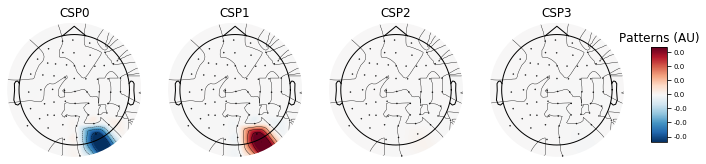



Subject 35
Loading denoise_classify_data/data_35.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_35.pkl
Transforming to ICA space (64 components)
Zeroing out 4 ICA components
(200, 64, 2561)
(200,)
Imagery Train Dataset Shape: (140, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (140,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 8.9e+09  max singular value)
    Estimated rank (mag): 60
    MAG: rank 60 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 60
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 9.1e+09  max singular value)
    Estimated rank (mag): 60
    MAG: rank 60 computed from 64 data channels with 0 projectors
    Setting small MAG eig

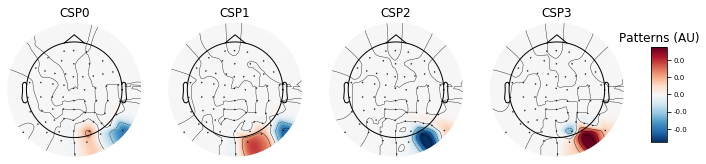



Subject 36
Loading denoise_classify_data/data_36.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_36.pkl
Transforming to ICA space (64 components)
Zeroing out 6 ICA components
(196, 64, 2561)
(196,)
Imagery Train Dataset Shape: (137, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (137,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00017 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 58
    MAG: rank 58 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 58
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 58
    MAG: rank 58 computed from 64 data channels with 0 projectors
    Setting small MAG eig

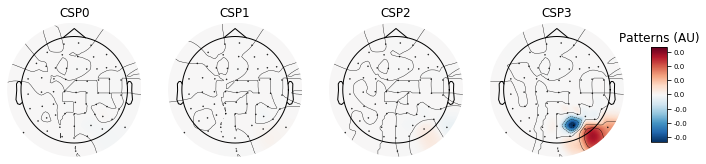



Subject 37
Loading denoise_classify_data/data_37.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_37.pkl
Transforming to ICA space (64 components)
Zeroing out 4 ICA components
(149, 64, 2561)
(149,)
Imagery Train Dataset Shape: (104, 64, 2561)
Imagery Test Dataset Shape: (45, 64, 2561)
Imagery Train Labels Shape: (104,)
Imagery Test Labels Shape: (45,)
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.8e+09  max singular value)
    Estimated rank (mag): 60
    MAG: rank 60 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 60
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.6e+09  max singular value)
    Estimated rank (mag): 60
    MAG: rank 60 computed from 64 data channels with 0 projectors
    Setting small MAG eig

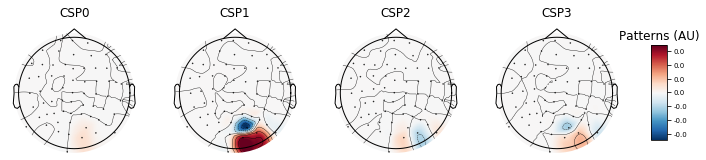



Subject 38
Loading denoise_classify_data/data_38.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_38.pkl
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(193, 64, 2561)
(193,)
Imagery Train Dataset Shape: (135, 64, 2561)
Imagery Test Dataset Shape: (58, 64, 2561)
Imagery Train Labels Shape: (135,)
Imagery Test Labels Shape: (58,)
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00016 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eig

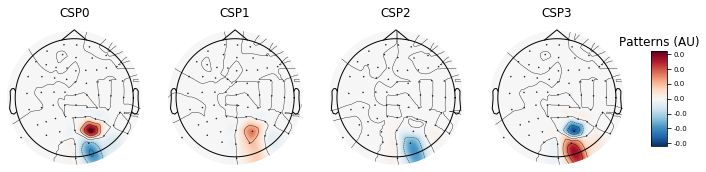



Subject 39
Loading denoise_classify_data/data_39.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_39.pkl
Transforming to ICA space (64 components)
Zeroing out 3 ICA components
(30, 64, 2561)
(30,)
Imagery Train Dataset Shape: (21, 64, 2561)
Imagery Test Dataset Shape: (9, 64, 2561)
Imagery Train Labels Shape: (21,)
Imagery Test Labels Shape: (9,)
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 64 dim * 8.4e+09  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues

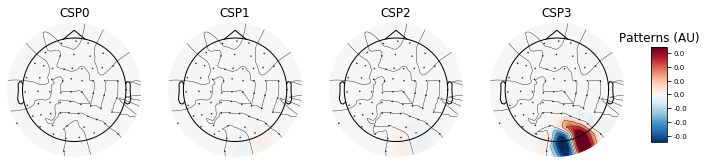



Subject 40
Loading denoise_classify_data/data_40.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_40.pkl
Transforming to ICA space (64 components)
Zeroing out 7 ICA components
(195, 64, 2561)
(195,)
Imagery Train Dataset Shape: (136, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (136,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00023 (2.2e-16 eps * 64 dim * 1.6e+10  max singular value)
    Estimated rank (mag): 57
    MAG: rank 57 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 57
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00023 (2.2e-16 eps * 64 dim * 1.6e+10  max singular value)
    Estimated rank (mag): 57
    MAG: rank 57 computed from 64 data channels with 0 projectors
    Setting small MAG eig

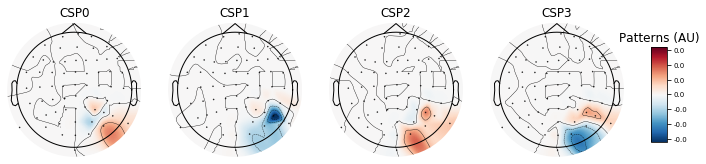



Subject 41
Loading denoise_classify_data/data_41.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_41.pkl
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(163, 64, 2561)
(163,)
Imagery Train Dataset Shape: (114, 64, 2561)
Imagery Test Dataset Shape: (49, 64, 2561)
Imagery Train Labels Shape: (114,)
Imagery Test Labels Shape: (49,)
Computing rank from data with rank=None
    Using tolerance 0.00023 (2.2e-16 eps * 64 dim * 1.6e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00024 (2.2e-16 eps * 64 dim * 1.7e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eige

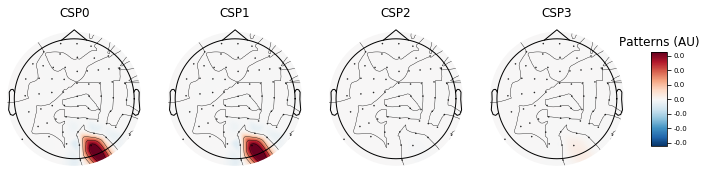



Subject 42
Loading denoise_classify_data/data_42.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_42.pkl
Transforming to ICA space (64 components)
Zeroing out 2 ICA components
(200, 64, 2561)
(200,)
Imagery Train Dataset Shape: (140, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (140,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 64 data channels with 0 projectors
    Setting small MAG eigen

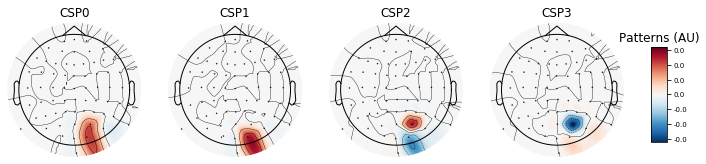



Subject 43
Loading denoise_classify_data/data_43.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_43.pkl
Transforming to ICA space (64 components)
Zeroing out 4 ICA components
(183, 64, 2561)
(183,)
Imagery Train Dataset Shape: (128, 64, 2561)
Imagery Test Dataset Shape: (55, 64, 2561)
Imagery Train Labels Shape: (128,)
Imagery Test Labels Shape: (55,)
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 9.3e+09  max singular value)
    Estimated rank (mag): 60
    MAG: rank 60 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 60
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.7e+09  max singular value)
    Estimated rank (mag): 60
    MAG: rank 60 computed from 64 data channels with 0 projectors
    Setting small MAG eig

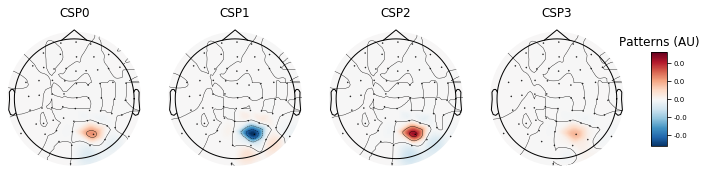



Subject 44
Loading denoise_classify_data/data_44.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_44.pkl
Transforming to ICA space (64 components)
Zeroing out 4 ICA components
(76, 64, 2561)
(76,)
Imagery Train Dataset Shape: (53, 64, 2561)
Imagery Test Dataset Shape: (23, 64, 2561)
Imagery Train Labels Shape: (53,)
Imagery Test Labels Shape: (23,)
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.9e+09  max singular value)
    Estimated rank (mag): 60
    MAG: rank 60 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 60
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 60
    MAG: rank 60 computed from 64 data channels with 0 projectors
    Setting small MAG eigenva

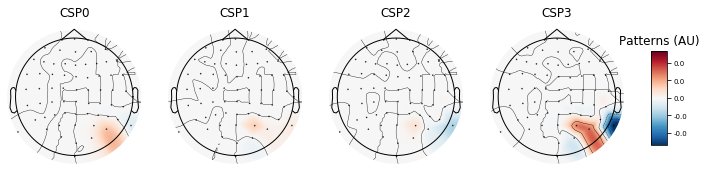



Subject 45
Loading denoise_classify_data/data_45.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_45.pkl
Transforming to ICA space (64 components)
Zeroing out 4 ICA components
(135, 64, 2561)
(135,)
Imagery Train Dataset Shape: (94, 64, 2561)
Imagery Test Dataset Shape: (41, 64, 2561)
Imagery Train Labels Shape: (94,)
Imagery Test Labels Shape: (41,)
Computing rank from data with rank=None
    Using tolerance 0.00023 (2.2e-16 eps * 64 dim * 1.6e+10  max singular value)
    Estimated rank (mag): 60
    MAG: rank 60 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 60
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00023 (2.2e-16 eps * 64 dim * 1.6e+10  max singular value)
    Estimated rank (mag): 60
    MAG: rank 60 computed from 64 data channels with 0 projectors
    Setting small MAG eigen

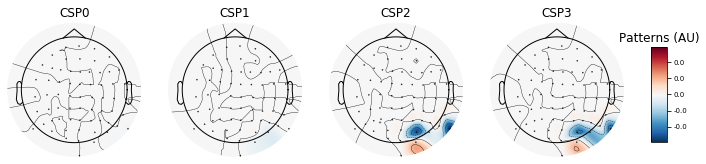



Subject 46
Loading denoise_classify_data/data_46.pkl
120 events found
Event IDs: [1]
120 events found
Event IDs: [1]
Loading denoise_classify_data/ica_46.pkl
Transforming to ICA space (64 components)
Zeroing out 4 ICA components
(190, 64, 2561)
(190,)
Imagery Train Dataset Shape: (133, 64, 2561)
Imagery Test Dataset Shape: (57, 64, 2561)
Imagery Train Labels Shape: (133,)
Imagery Test Labels Shape: (57,)
Computing rank from data with rank=None
    Using tolerance 0.00043 (2.2e-16 eps * 64 dim * 3e+10  max singular value)
    Estimated rank (mag): 60
    MAG: rank 60 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 60
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00042 (2.2e-16 eps * 64 dim * 3e+10  max singular value)
    Estimated rank (mag): 60
    MAG: rank 60 computed from 64 data channels with 0 projectors
    Setting small MAG eigenva

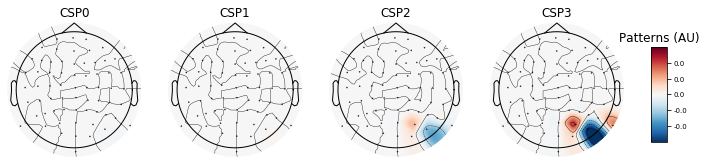



Subject 47
Loading denoise_classify_data/data_47.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_47.pkl
Transforming to ICA space (64 components)
Zeroing out 8 ICA components
(146, 64, 2561)
(146,)
Imagery Train Dataset Shape: (102, 64, 2561)
Imagery Test Dataset Shape: (44, 64, 2561)
Imagery Train Labels Shape: (102,)
Imagery Test Labels Shape: (44,)
Computing rank from data with rank=None
    Using tolerance 0.00028 (2.2e-16 eps * 64 dim * 2e+10  max singular value)
    Estimated rank (mag): 56
    MAG: rank 56 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 56
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00027 (2.2e-16 eps * 64 dim * 1.9e+10  max singular value)
    Estimated rank (mag): 56
    MAG: rank 56 computed from 64 data channels with 0 projectors
    Setting small MAG eigen

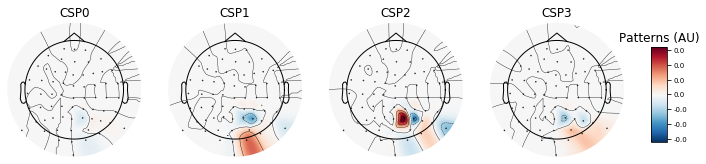



Subject 48
Loading denoise_classify_data/data_48.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_48.pkl
Transforming to ICA space (64 components)
Zeroing out 3 ICA components
(135, 64, 2561)
(135,)
Imagery Train Dataset Shape: (94, 64, 2561)
Imagery Test Dataset Shape: (41, 64, 2561)
Imagery Train Labels Shape: (94,)
Imagery Test Labels Shape: (41,)
Computing rank from data with rank=None
    Using tolerance 0.00029 (2.2e-16 eps * 64 dim * 2e+10  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0003 (2.2e-16 eps * 64 dim * 2.1e+10  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 64 data channels with 0 projectors
    Setting small MAG eigenval

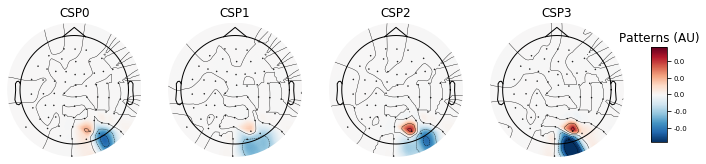



Subject 49
Loading denoise_classify_data/data_49.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_49.pkl
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(193, 64, 2561)
(193,)
Imagery Train Dataset Shape: (135, 64, 2561)
Imagery Test Dataset Shape: (58, 64, 2561)
Imagery Train Labels Shape: (135,)
Imagery Test Labels Shape: (58,)
Computing rank from data with rank=None
    Using tolerance 0.00025 (2.2e-16 eps * 64 dim * 1.8e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00023 (2.2e-16 eps * 64 dim * 1.6e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eige

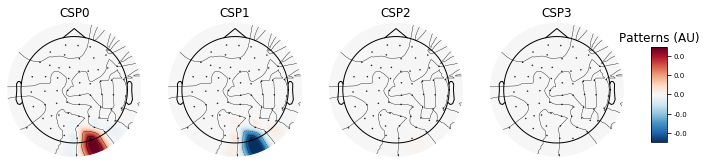



Subject 50
Loading denoise_classify_data/data_50.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_50.pkl
Transforming to ICA space (64 components)
Zeroing out 3 ICA components
(199, 64, 2561)
(199,)
Imagery Train Dataset Shape: (139, 64, 2561)
Imagery Test Dataset Shape: (60, 64, 2561)
Imagery Train Labels Shape: (139,)
Imagery Test Labels Shape: (60,)
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.3e+10  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 64 dim * 1.3e+10  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 64 data channels with 0 projectors
    Setting small MAG eig

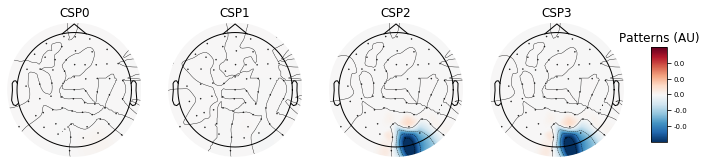



Subject 51
Loading denoise_classify_data/data_51.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_51.pkl
Transforming to ICA space (64 components)
Zeroing out 1 ICA component
(189, 64, 2561)
(189,)
Imagery Train Dataset Shape: (132, 64, 2561)
Imagery Test Dataset Shape: (57, 64, 2561)
Imagery Train Labels Shape: (132,)
Imagery Test Labels Shape: (57,)
Computing rank from data with rank=None
    Using tolerance 0.00023 (2.2e-16 eps * 64 dim * 1.6e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00021 (2.2e-16 eps * 64 dim * 1.5e+10  max singular value)
    Estimated rank (mag): 63
    MAG: rank 63 computed from 64 data channels with 0 projectors
    Setting small MAG eige

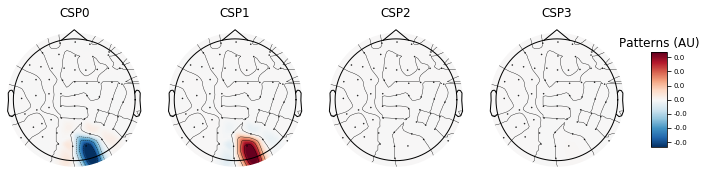



Subject 52
Loading denoise_classify_data/data_52.pkl
100 events found
Event IDs: [1]
100 events found
Event IDs: [1]
Loading denoise_classify_data/ica_52.pkl
Transforming to ICA space (64 components)
Zeroing out 3 ICA components
(196, 64, 2561)
(196,)
Imagery Train Dataset Shape: (137, 64, 2561)
Imagery Test Dataset Shape: (59, 64, 2561)
Imagery Train Labels Shape: (137,)
Imagery Test Labels Shape: (59,)
Computing rank from data with rank=None
    Using tolerance 0.00019 (2.2e-16 eps * 64 dim * 1.4e+10  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 64 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00019 (2.2e-16 eps * 64 dim * 1.3e+10  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 64 data channels with 0 projectors
    Setting small MAG eig

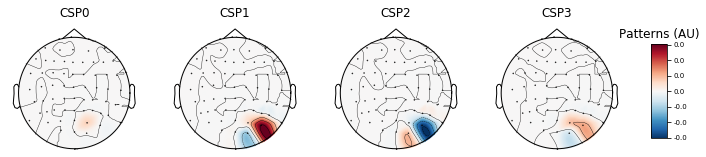

In [3]:
tmin = -1
tmax = 4
reject_criteria = {'eeg': 100e-6}       # 150 µV The default from the overview tutorial
filter_freqs = (7, 30)
filter_props = dict(picks=['eeg'], fir_design='firwin', skip_by_annotation='edge')
n_ica_comps = 64
train_classification_accuracies = dict()
test_classification_accuracies = dict()
error_log = set()

if not os.path.exists(data_path):
    os.mkdir(data_path)

for subj_n in range(1, 53):
    print("\n\n========================================")
    print('Subject {:02d}'.format(subj_n))
    print("========================================")
    if os.path.exists(subject_data_pickle_path(subj_n)):
        with open(subject_data_pickle_path(subj_n), 'rb') as f:
            print('Loading', subject_data_pickle_path(subj_n))
            data = pkl.load(f)
    else:
        data = SubjectData('Cho2017-Data/s{:02d}.mat'.format(subj_n))
        with open(subject_data_pickle_path(subj_n), 'wb') as f:
            pkl.dump(data, f)
    try:
        im_left_epochs = data.get_epochs('imagery_left', tmin=tmin, tmax=tmax, picks=['eeg'], filter_freqs=(1, None), reject_criteria=None, verbose=False)
        im_right_epochs = data.get_epochs('imagery_right', tmin=tmin, tmax=tmax, picks=['eeg'], filter_freqs=(1, None), reject_criteria=None, verbose=False)
        # Set left events to 0 to have 2 distinct class labels (left: 0 and right: 1)
        im_left_epochs.events[:, -1] = 0
        im_left_epochs.event_id = {'0': 0}

        joint_im_epochs = mne.concatenate_epochs([im_left_epochs.copy(), im_right_epochs.copy()], add_offset=True)
        
        
        if os.path.exists(subject_ica_pickle_path(subj_n)):
            with open(subject_ica_pickle_path(subj_n), 'rb') as f:
                print('Loading', subject_ica_pickle_path(subj_n))
                ica_joint = pkl.load(f)
        else:
            ica_joint = mne.preprocessing.ICA(n_components=n_ica_comps, random_state=ICA_SEED, max_iter=1000)
            ica_joint.fit(joint_im_epochs)
            with open(subject_ica_pickle_path(subj_n), 'wb') as f:
                print('Writing', subject_ica_pickle_path(subj_n))
                pkl.dump(ica_joint, f)
        
        ica_joint.exclude = excludes[subj_n]
        ica_joint.apply(joint_im_epochs)
        joint_im_epochs.filter(*filter_freqs, **filter_props).drop_bad(reject_criteria)
        im_labels = joint_im_epochs.events[:, -1]
        im_data = joint_im_epochs.get_data()
        im_data = UnsupervisedSpatialFilter(PCA()).fit_transform(im_data)      

        print(im_data.shape)
        print(im_labels.shape)

        X_train, X_test, Y_train, Y_test = train_test_split(im_data, im_labels, test_size = 0.3, 
                                                          random_state=SPLIT_SEED)

        print('Imagery Train Dataset Shape:', X_train.shape)
        print('Imagery Test Dataset Shape:', X_test.shape)
        print('Imagery Train Labels Shape:', Y_train.shape)
        print('Imagery Test Labels Shape:', Y_test.shape)

        cv = ShuffleSplit(10, test_size=0.2, random_state=SPLIT_SEED)
        cv_split = cv.split(im_data)

        lda = LinearDiscriminantAnalysis()
        csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)
        clf = Pipeline([('CSP', csp), ('LDA', lda)])

        cross_val_scores = cross_val_score(clf, X_train, Y_train, cv=cv, n_jobs=8)
        clf.fit(X_train, Y_train)
        Y_pred_train = clf.predict(X_train)
        Y_pred_test = clf.predict(X_test)

        train_scores = accuracy_score(Y_train, Y_pred_train, normalize=True)
        test_scores = accuracy_score(Y_test, Y_pred_test, normalize=True)
        train_classification_accuracies[subj_n] = train_scores
        test_classification_accuracies[subj_n] = test_scores

        train_class_balance = np.mean(Y_train == Y_train[0])
        train_class_balance = max(train_class_balance, 1. - train_class_balance)
        test_class_balance = np.mean(Y_test == Y_test[0])
        test_class_balance = max(test_class_balance, 1. - test_class_balance)

        print("Cross Validation accuracy: %f" % (np.mean(cross_val_scores)))
        print("Train Classification accuracy: %f, Test Classification accuracy: %f" 
            % (train_scores, test_scores))
        print("Train Data Chance level: %f" % (train_class_balance))
        print("Test Data Chance level: %f" % (test_class_balance))
        _ = csp.fit_transform(im_data, im_labels)

        csp.plot_patterns(joint_im_epochs.copy().pick_types(eeg=True).info, ch_type='eeg',
                  units='Patterns (AU)', size=1.5)
    except Exception as e:
        print("Error in: ", subj_n, ": " , e)
        error_log.add(str(subj_n) + "\n**********Trace********" + str(e))

In [7]:
import collections
train_classification_accuracies = {k:v*100 for k, v in train_classification_accuracies.items()}
test_classification_accuracies = {k:v*100 for k, v in test_classification_accuracies.items()}

ordered_train_classification_accuracies = collections.OrderedDict(sorted(train_classification_accuracies.items()))
ordered_test_classification_accuracies = collections.OrderedDict(sorted(test_classification_accuracies.items()))

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]

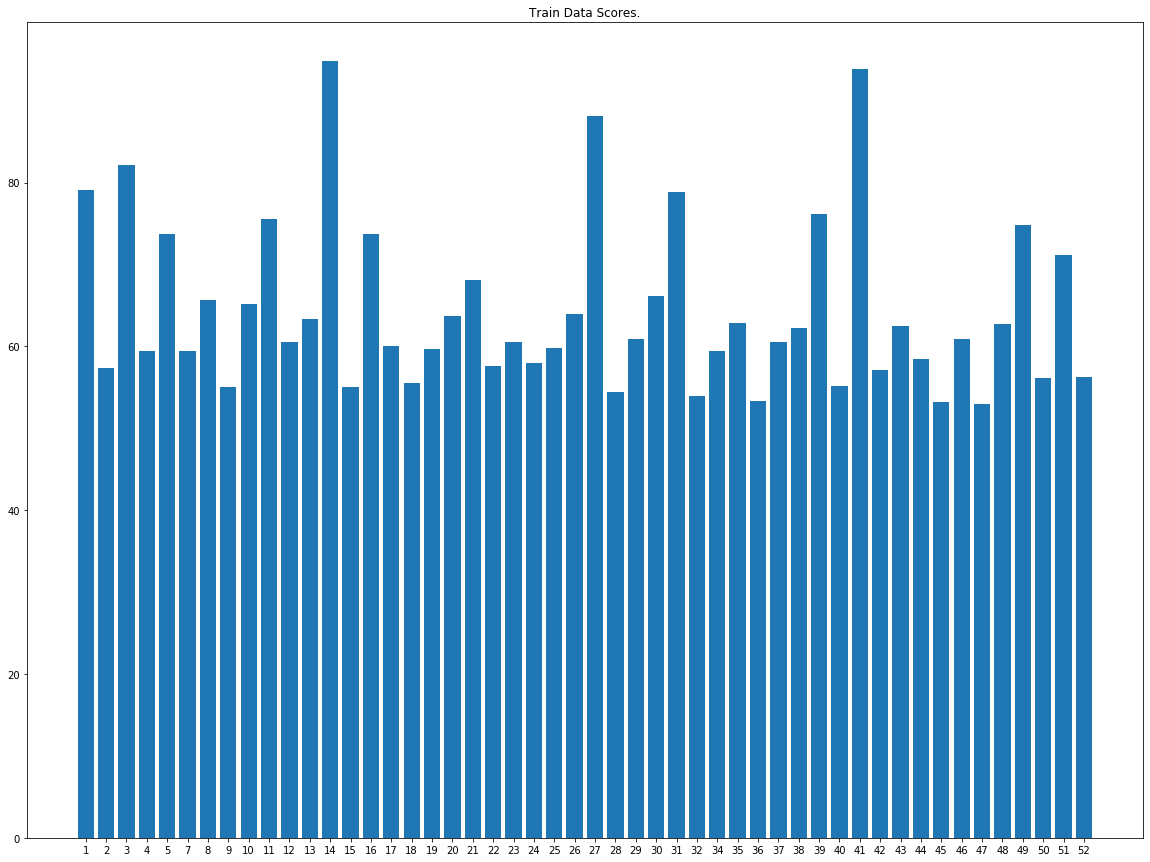

In [11]:
plt.bar(range(len(train_classification_accuracies)), list(ordered_train_classification_accuracies.values()), align='center')
plt.xticks(range(len(train_classification_accuracies)), list(ordered_train_classification_accuracies.keys()))
plt.title("Train Data Scores.")
plt.savefig('train_scores_PCA.png')
plt.show()

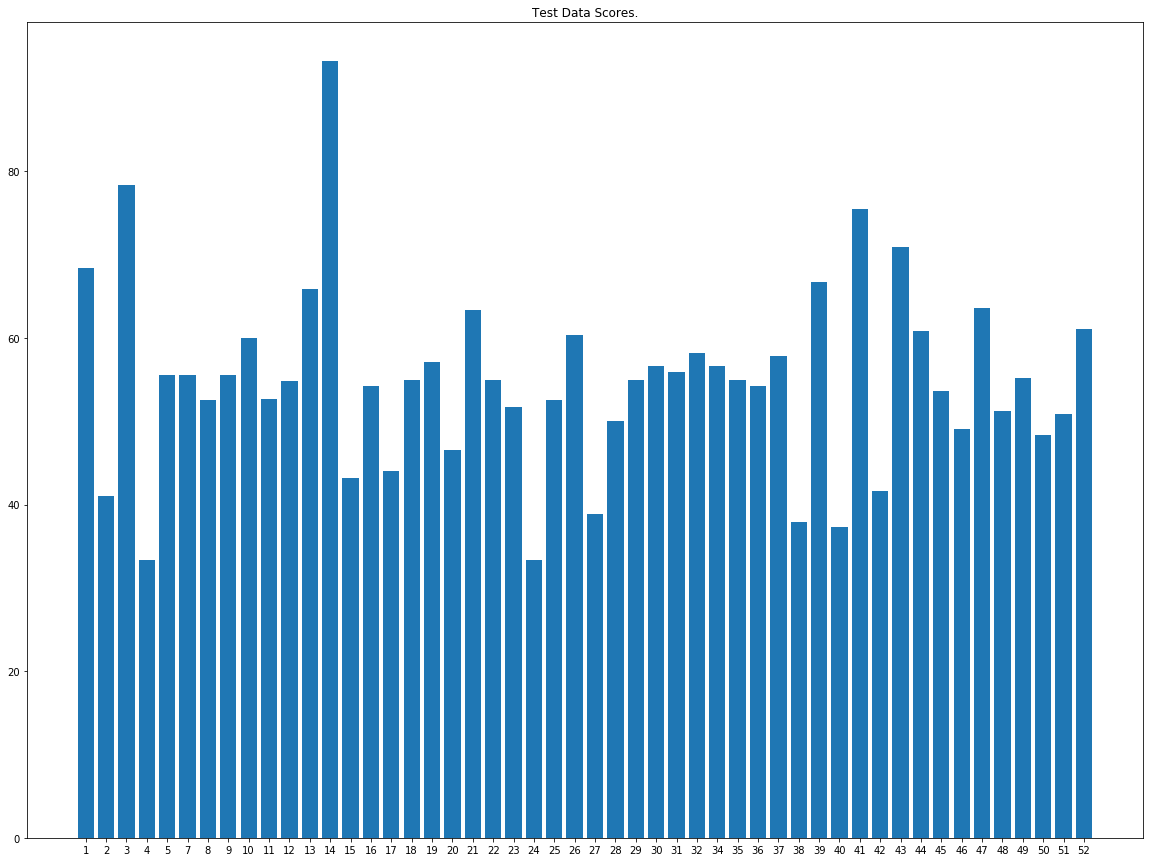

In [12]:
plt.bar(range(len(test_classification_accuracies)), list(ordered_test_classification_accuracies.values()), align='center')
plt.xticks(range(len(test_classification_accuracies)), list(ordered_test_classification_accuracies.keys()))
plt.title("Test Data Scores.")
plt.savefig('test_scores_PCA.png')
plt.show()